## Numpy

In [2]:
import numpy as np
import random

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [3]:
%%time
 
arr = [random.random() for _ in range(10000)]
arr = map(lambda x: x+1, arr)
sum1 = 0
for i in arr:
    sum1 += i

print (sum1)

14968.811023970322
CPU times: total: 0 ns
Wall time: 3.01 ms


In [4]:
%%time

arr = np.random.random(10000)
arr = map(lambda x: x+1, arr)
sum2 = np.sum(arr)
print (sum2)

CPU times: total: 0 ns
Wall time: 0 ns


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [5]:
%%time
from math import sin, cos

arr = [random.random() for _ in range(10000)]
x = 0
for i in arr:
    x += sin(i) + cos(i)
print(x)



13015.311790273805
CPU times: total: 15.6 ms
Wall time: 4.04 ms


In [6]:
%%time
import numpy as np

arr = np.random.random(10000)
x = np.sum(np.sin(arr) + np.cos(arr))
print(x)

13023.915240569402
CPU times: total: 31.2 ms
Wall time: 1.05 ms


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [7]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result


def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result


def cube_sum_fast(x: np.ndarray):
    """Zwraca sume szescianow elementow"""
    x = np.power(x,3)
    return np.sum(x)


def almost_variance_fast(x: np.ndarray):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = np.mean(x)
    powers = (x - m) ** 4
    return np.mean(powers)

In [8]:
%%timeit
cube_sum(arr)

2.51 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit
almost_variance(arr)

4.05 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
cube_sum_fast(arr)

251 µs ± 4.95 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%%timeit
almost_variance_fast(arr)

304 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [12]:
def multiplication(matrix: np.ndarray) -> np.ndarray:
    return matrix * matrix.reshape(matrix.size,1)
print(multiplication(np.arange(1, 6)))

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [38]:
def euklides(arr: np.array):
    transp_arr = np.transpose(arr)
    return np.sqrt(np.sum((transp_arr[:, np.newaxis, :] - transp_arr[np.newaxis, :, :])**2, axis=2))

arr = np.random.randint(low=0, high=100, size=(10, 5))
print(arr)
print(euklides(arr))

[[11 47  9 14 54]
 [80 44 56 90 13]
 [62 71 71 30 50]
 [64 67 21 98 90]
 [55 84 35 71 42]
 [88 82 90 53 38]
 [52 94 73 11 75]
 [43 12 58 40 22]
 [89 53 45 74 56]
 [44 50  9  3 67]]
[[  0.          87.26969692  82.1035931   85.82540416 111.42261889]
 [ 87.26969692   0.         102.32790431 131.07249902  80.24337979]
 [ 82.1035931  102.32790431   0.         128.45621822 128.89530635]
 [ 85.82540416 131.07249902 128.45621822   0.         133.78714437]
 [111.42261889  80.24337979 128.89530635 133.78714437   0.        ]]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [31]:
from scipy.linalg import fractional_matrix_power

def whiten(X: np.ndarray) -> np.ndarray:
    s2 = np.var(X)
    b = np.sqrt(s2)
    return (X - np.mean(X,0))/ b
return_arr = whiten(np.array([[0,1],[2,3],[4,5],[6,7],[8,9]]))
print(return_arr)

[[-1.39262125 -1.39262125]
 [-0.69631062 -0.69631062]
 [ 0.          0.        ]
 [ 0.69631062  0.69631062]
 [ 1.39262125  1.39262125]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [15]:
def closest(x: float, A: np.ndarray) -> np.ndarray:
    return A[np.argmin(np.abs(A - x))]

print(closest(1.5, np.array([1,4,3])))

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [16]:
def poly(x: int, a: np.ndarray) -> np.ndarray:
    arr = np.array([a])
    powers = np.array([np.power(x, np.arange(len(a)))])
    return(np.sum(np.cumprod(np.concatenate((arr, powers), axis = 0), axis=0)[1]))

print(poly(3, np.array([1, 2, 4])))

43


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

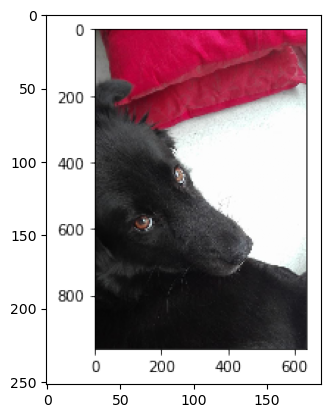

In [40]:
img = mpimg.imread('dog.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

In [54]:
def size_img(img):
    return np.array(img.shape) @ np.array([0.2126, 0.7152, 0.0722])

img = mpimg.imread('dog.png')
print(img.shape)
print(size_img(img))

(252, 187, 4)
187.6064


### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [60]:
def interpolation(x1, x2, lambdas):
    x1 = np.array(x1)
    x2 = np.array(x2)
    interpolations = [l * x1 + (1 - l) * x2 for l in lambdas]
    return np.array(interpolations)

lambdas = np.linspace(0, 1, 10)
interpolations = interpolation([10, 2, 23], [5, 12, 13], lambdas)

for i, l in enumerate(lambdas):
    print(f'lambda = {round(l,2)}: interpolacja= {interpolations[i]}')


lambda = 0.0: interpolacja= [ 5. 12. 13.]
lambda = 0.11: interpolacja= [ 5.55555556 10.88888889 14.11111111]
lambda = 0.22: interpolacja= [ 6.11111111  9.77777778 15.22222222]
lambda = 0.33: interpolacja= [ 6.66666667  8.66666667 16.33333333]
lambda = 0.44: interpolacja= [ 7.22222222  7.55555556 17.44444444]
lambda = 0.56: interpolacja= [ 7.77777778  6.44444444 18.55555556]
lambda = 0.67: interpolacja= [ 8.33333333  5.33333333 19.66666667]
lambda = 0.78: interpolacja= [ 8.88888889  4.22222222 20.77777778]
lambda = 0.89: interpolacja= [ 9.44444444  3.11111111 21.88888889]
lambda = 1.0: interpolacja= [10.  2. 23.]
